#### Import library

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### Import stock price data stored in matrix (50 No. stocks, 500 No. trading days)

In [7]:

# Specify the file path
file_path = 'prices.txt'
SP_List = []
# Open the file in read mode ('r')
with open(file_path, 'r') as file:
    # Read the entire file content
    SP_line = file.readlines()
    for i in SP_line:
        SP_List.append(list(map(float, i.split())))

SP_matrix = np.array(SP_List)
SP_matrix = np.transpose(SP_matrix)
print(SP_matrix, SP_matrix.shape)


[[13.46 13.48 13.47 ... 13.69 13.55 13.4 ]
 [71.65 72.1  72.35 ... 67.83 67.61 67.33]
 [48.46 48.52 48.48 ... 46.66 46.73 46.72]
 ...
 [36.22 36.27 36.39 ... 33.6  33.79 33.82]
 [49.   48.84 48.56 ... 33.75 33.53 33.4 ]
 [56.09 56.08 55.9  ... 54.22 54.5  55.01]] (50, 500)


#### check price stock characteristic

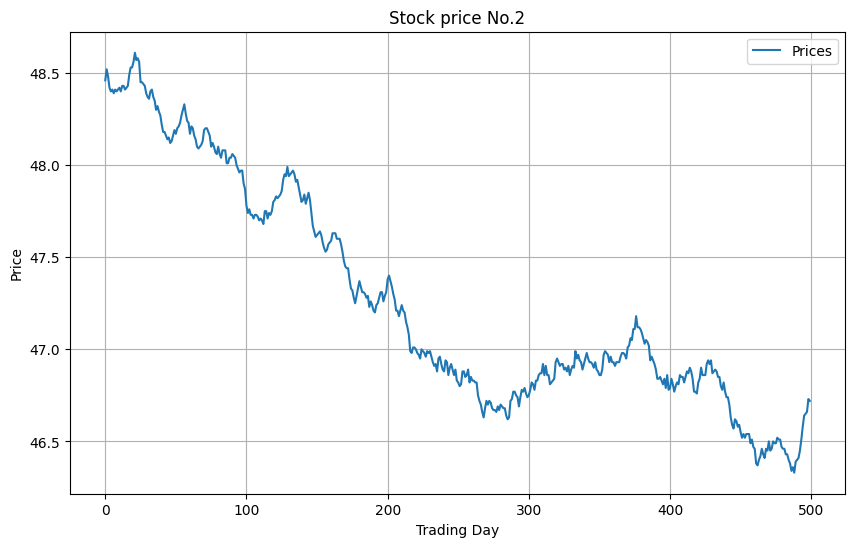

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(SP_matrix[2,:], label='Prices')
plt.title('Stock price No.2')
plt.xlabel('Trading Day')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig('stock price no.2.png')
plt.show()

#### EMA 12 days for each stock

#### create matrix to store EMA 12 for each stock 

In [17]:
EMA_12 = np.zeros((50,500)) ### create matrix 50 x 500 with zero values

##### Set Parameters and Calculating Function

In [20]:
# Function to calculate EMA
def calculate_ema(prices, N=12):  ## time period 12, so N=12
    alpha = 2 / (N + 1)
    EMA = []
    EMA.append(prices[0])  # Start with the first price as initial EMA  EMA(t=0) = P(t=0)
    for i in range(1, len(prices)):
        EMA_val = alpha * prices[i] + (1 - alpha) * EMA[i - 1]  #EMA(t) = α * P(t) + (1-α) * EMA(t-1)
        EMA.append(EMA_val)
    return np.array(EMA)
    

#### Loop for calculating EMA 12 for 50 stocks, and store into EMA_12 matrix

In [52]:
for i in range(SP_matrix.shape[0]): # loop for 50 stocks
    EMA_12[i,:] = calculate_ema(SP_matrix[i,:])
print(EMA_12)

[[13.46       13.46307692 13.46414201 ... 13.56658162 13.5640306
  13.53879512]
 [71.65       71.71923077 71.81627219 ... 67.2890457  67.33842329
  67.3371274 ]
 [48.46       48.46923077 48.47088757 ... 46.52870218 46.55967107
  46.58433706]
 ...
 [36.22       36.22769231 36.25266272 ... 33.64186695 33.66465665
  33.68855563]
 [49.         48.97538462 48.91147929 ... 33.59504043 33.58503421
  33.55656741]
 [56.09       56.08846154 56.05946746 ... 54.0920213  54.15478725
  54.28635845]]


#### Plot EMA12 vs Stock Price No.2

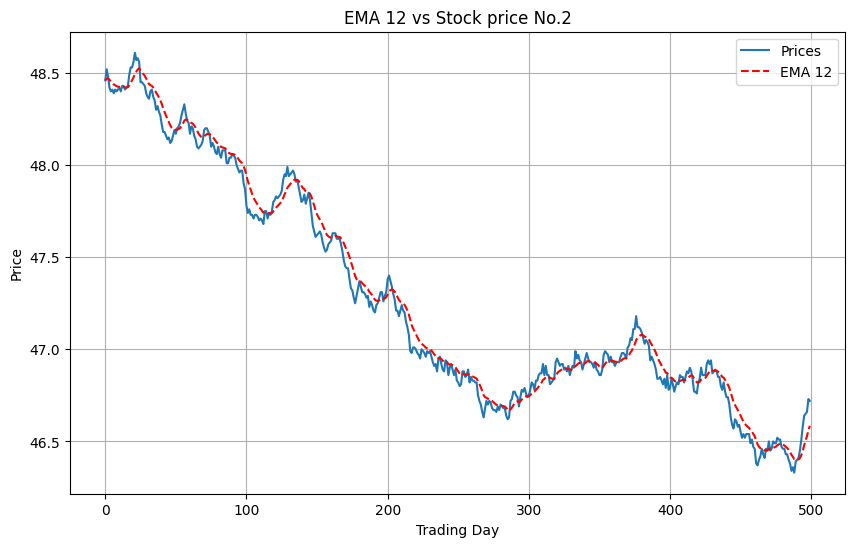

In [67]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(SP_matrix[2,:], label='Prices')
plt.plot(EMA_12[2,:], label='EMA 12', linestyle='--', color='red')
plt.title('EMA 12 vs Stock price No.2')
plt.xlabel('Trading Day')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig('EMA12 of Stock No.2.png')
plt.show()